<a href="https://colab.research.google.com/github/r-emerald/ML-AI/blob/master/Sentiment_Analysis_for_IMDB_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing data 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
data=pd.read_csv('gdrive/My Drive/10x/IMDB.csv')
print(data.head(3))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive


In [2]:
import numpy as np
import pandas as pd
print(data.head(3))
print(list(data.columns))
print(data.shape) 

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
['review', 'sentiment']
(50000, 2)


# Text preprocessing:
1. Removing html br tag
1. Punctuation removal
2. Converting it to lowercase
3. Stop word removal
4. Tokenization
5. Lemmatization

https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

In [3]:
!pip install nltk

In [4]:
import nltk 
import numpy as np
import pandas as pd
import re
import string
import math

In [5]:
data['review'] = data['review'].str.replace('<br />','')
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [6]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['clean_review']= data['review'].apply(lambda x:remove_punctuation(x))
print(data['clean_review'][32])

My first exposure to the Templarios  not a good one I was excited to find this title among the offerings from Anchor Bay Video which has brought us other cult classics such as Spider Baby The print quality is excellent but this alone cant hide the fact that the film is deadly dull Theres a thrilling opening sequence in which the villagers exact a terrible revenge on the Templars  set the whole thing in motion but everything else in the movie is slow ponderous  ultimately unfulfilling Adding insult to injury the movie was dubbed not subtitled as promised on the video jacket


In [7]:
data['lower_review']= data['clean_review'].apply(lambda x: x.lower())
print(data['lower_review'][32])

my first exposure to the templarios  not a good one i was excited to find this title among the offerings from anchor bay video which has brought us other cult classics such as spider baby the print quality is excellent but this alone cant hide the fact that the film is deadly dull theres a thrilling opening sequence in which the villagers exact a terrible revenge on the templars  set the whole thing in motion but everything else in the movie is slow ponderous  ultimately unfulfilling adding insult to injury the movie was dubbed not subtitled as promised on the video jacket


In [8]:
import re
def tokenization(text):
    #tokens = re.split('W+',text)
    tokens = re.findall("[\w']+", text)
    return tokens
#applying function to the column
data['tokenized']= data['lower_review'].apply(lambda x: tokenization(x))
print(data['tokenized'][32])

['my', 'first', 'exposure', 'to', 'the', 'templarios', 'not', 'a', 'good', 'one', 'i', 'was', 'excited', 'to', 'find', 'this', 'title', 'among', 'the', 'offerings', 'from', 'anchor', 'bay', 'video', 'which', 'has', 'brought', 'us', 'other', 'cult', 'classics', 'such', 'as', 'spider', 'baby', 'the', 'print', 'quality', 'is', 'excellent', 'but', 'this', 'alone', 'cant', 'hide', 'the', 'fact', 'that', 'the', 'film', 'is', 'deadly', 'dull', 'theres', 'a', 'thrilling', 'opening', 'sequence', 'in', 'which', 'the', 'villagers', 'exact', 'a', 'terrible', 'revenge', 'on', 'the', 'templars', 'set', 'the', 'whole', 'thing', 'in', 'motion', 'but', 'everything', 'else', 'in', 'the', 'movie', 'is', 'slow', 'ponderous', 'ultimately', 'unfulfilling', 'adding', 'insult', 'to', 'injury', 'the', 'movie', 'was', 'dubbed', 'not', 'subtitled', 'as', 'promised', 'on', 'the', 'video', 'jacket']


In [9]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
#print(stopwords[0:20])
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
data['no_stopwords']= data['tokenized'].apply(lambda x:remove_stopwords(x))
print(data['no_stopwords'][33])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['one', 'significant', 'quotes', 'entire', 'film', 'pronounced', 'halfway', 'protagonist', 'mafia', 'middleman', 'titta', 'di', 'girolamo', 'physically', 'nondescript', 'middleaged', 'man', 'originally', 'salerno', 'southern', 'italy', 'introduced', 'start', 'film', 'hes', 'living', 'nonlife', 'elegant', 'sterile', 'hotel', 'italianspeaking', 'canton', 'switzerland', 'last', 'ten', 'years', 'conducting', 'business', 'gradually', 'introduced', 'pivotal', 'yet', 'apparently', 'unremarkable', 'scene', 'takes', 'place', 'employees', 'swiss', 'bank', 'normally', 'count', 'di', 'girolamos', 'cash', 'tell', '10000', 'dollars', 'missing', 'usual', 'suitcase', 'full', 'tightly', 'stacked', 'banknotes', 'news', 'quietly', 'icily', 'threatens', 'coaxing', 'bank', 'manager', 'wanting', 'close', 'account', 'meanwhile', 'tells', 'us', 'spectators', 'bluff', 'bluff', 'right', 'end', 

In [10]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
data['lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))
print(data['lemmatized'][33])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['one', 'significant', 'quote', 'entire', 'film', 'pronounced', 'halfway', 'protagonist', 'mafia', 'middleman', 'titta', 'di', 'girolamo', 'physically', 'nondescript', 'middleaged', 'man', 'originally', 'salerno', 'southern', 'italy', 'introduced', 'start', 'film', 'he', 'living', 'nonlife', 'elegant', 'sterile', 'hotel', 'italianspeaking', 'canton', 'switzerland', 'last', 'ten', 'year', 'conducting', 'business', 'gradually', 'introduced', 'pivotal', 'yet', 'apparently', 'unremarkable', 'scene', 'take', 'place', 'employee', 'swiss', 'bank', 'normally', 'count', 'di', 'girolamos', 'cash', 'tell', '10000', 'dollar', 'missing', 'usual', 'suitcase', 'full', 'tightly', 'stacked', 'banknote', 'news', 'quietly', 'icily', 'threatens', 'coaxing', 'bank', 'manager', 'wanting', 'close', 'account', 'meanwhile', 'tell', 'u', 'spectator', 'bluff', 'bluff', 'right', 'end', 'without', 'fe

# Exploratory Data Analysis

https://www.enjoyalgorithms.com/blog/sentiment-analysis-using-machine-learning 

https://kanoki.org/2019/03/17/text-data-visualization-in-python/ 

**I am getting some error in using "scattertext" can you please help me fix that?**

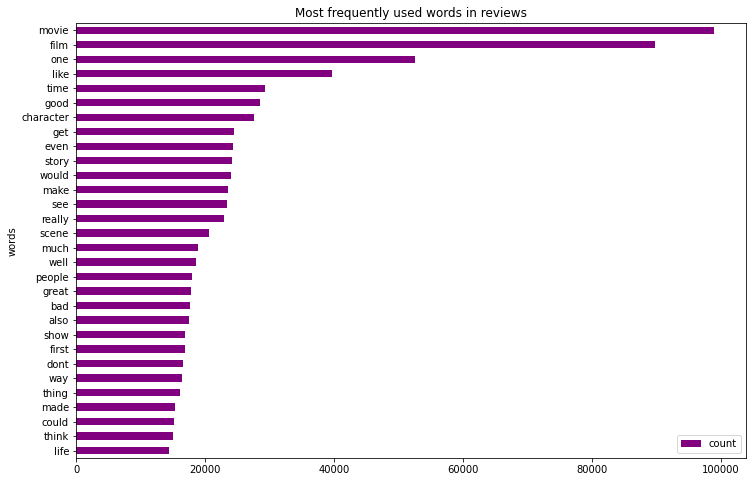

In [11]:
import itertools
import collections
import matplotlib.pyplot as plt
lemmatized_tokens = list(data['lemmatized'])
token_list = list(itertools.chain(*lemmatized_tokens))
counts_no = collections.Counter(token_list)
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words','count'])
fig, ax = plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='purple')
ax.set_title("Most frequently used words in reviews")
plt.show()

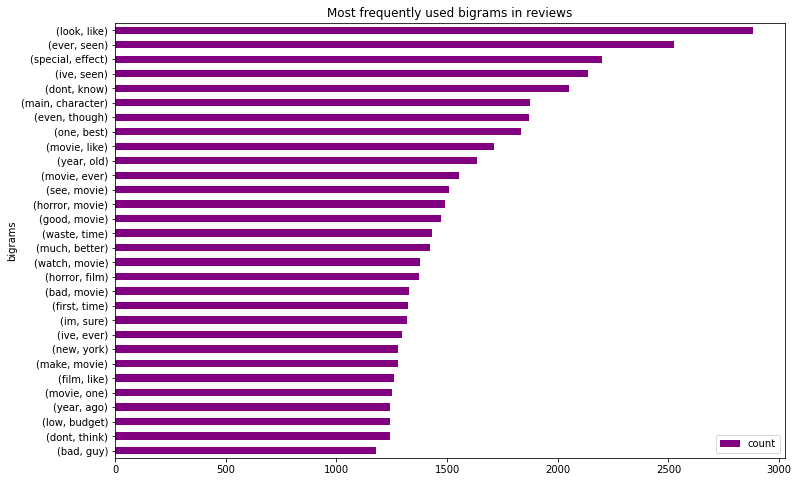

In [12]:
bigrams = zip(token_list, token_list[1:])
counts_no = collections.Counter(bigrams)
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['bigrams','count'])
fig, ax = plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='bigrams',y='count',ax=ax,color='purple')
ax.set_title("Most frequently used bigrams in reviews")
plt.show()

In [78]:
!pip install scattertext

     |████████████████████████████████| 7.3 MB 4.6 MB/s 
     |████████████████████████████████| 24.1 MB 1.3 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=dae42d255cfc436dcb3dd901130cf361fb94b5034674d3473828706d7cdde041
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [81]:
import scattertext as st
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
corpus = data.loc[(data['sentiment'] == "positive") | (data['sentiment'] == 'negative')]
#print(corpus)
corpus = st.CorpusFromParsedDocuments(data.iloc[:2000,:],category_col='sentiment',parsed_col='lemmatized').build()
#corpus = st.CorpusFromParsedDocuments(corpus, category_col='sentiment', parsed_col='parsed').build()

html = st.produce_scattertext_explorer(corpus,
                                       category = "positive",
                                       category_name = "negative",
                                       not_category_name="positive",
                                       minimum_term_frequency=5,
                                       width_in_pixels=1000,
                                       transform=st.Scalars.log_scale_standardize)
file_name = 'Sentimental Words Visualization.html'
open(file_name,'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width=1000,height=700)

AttributeError: ignored

# Modelling using:
1. Tf-idf Vectorization + Lightgbm evaluation
2. Bag of words + (RandomForestClassifier & MultinomialNB
3. Tf-idf Vectorization + (RandomForestClassifier & MultinomialNB)
4. Word2Vec + (GaussianNB + RandomForestClassifier)

https://towardsdatascience.com/unsupervised-semantic-sentiment-analysis-of-imdb-reviews-2c5f520fbf81 

https://github.com/towardsNLP/IMDB-Semantic-Sentiment-Analysis/tree/main/Word2Vec 



# Tf-idf Vectorization + ***Lightgbm evaluation*** 
(LightGBM is a fast, distributed, high performance gradient boosting framework based on decision tree algorithms, used for ranking, classification and many other machine learning tasks.)

AUC ~ 0.8

In [13]:
data.sentiment[data.sentiment == 'positive'] = 1
data.sentiment[data.sentiment == 'negative'] = 0

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_converter = TfidfVectorizer(max_features=2000)
features = tfidf_converter.fit_transform(data['review']).toarray()

In [15]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

target = data['sentiment']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
clf = lgb.LGBMClassifier(max_depth=20,
                         n_estimators = 25,
                         min_child_weight=0.0016,
                         n_jobs=-1)
y_train = np.asarray(y_train, dtype=np.float64)
y_test = np.asarray(y_test, dtype=np.float64)
print(y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print("Test data accuracy is:",accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

[1. 1. 0. ... 0. 0. 0.]
Test data accuracy is: 0.7995
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      5066
         1.0       0.78      0.82      0.80      4934

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



AUC: 0.7998122792915436


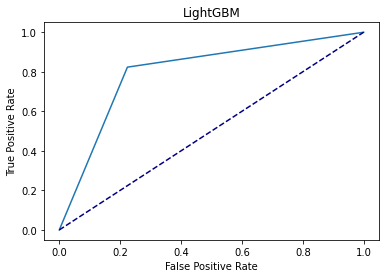

In [16]:
from sklearn.metrics import roc_curve, auc
y_test = y_test.astype(int)
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)
plt.plot(fpr, tpr)
plt.title("LightGBM")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


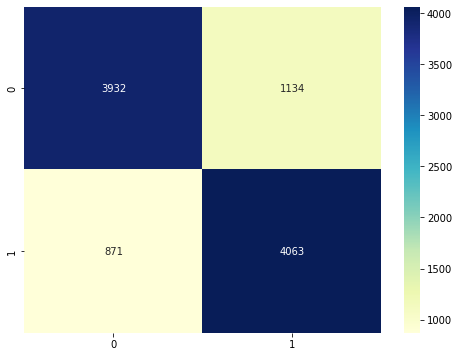

In [17]:
import seaborn as sns
#from sklearn.metrics import create_ticks
cm = confusion_matrix(y_test,pred)
#cm_matrix = create_ticks(cm)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu')

https://github.com/towardsNLP/IMDB-Semantic-Sentiment-Analysis/blob/main/Word2Vec/notebooks/W2V_SSA_IMDB_Blog.ipynb 

https://github.com/towardsNLP/IMDB-Semantic-Sentiment-Analysis/blob/main/Word2Vec/notebooks/W2V_SSA_IMDB_Blog.ipynb  => https://towardsdatascience.com/unsupervised-semantic-sentiment-analysis-of-imdb-reviews-2c5f520fbf81 

https://towardsdatascience.com/sentiment-analysis-a-how-to-guide-with-movie-reviews-9ae335e6bcb2 => read the blogs and do all methods

# Bag of Words/ CountVectorizer
AUC ~ 0.853

In [18]:
import pandas as pd  
from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords
import nltk.data
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import logging
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
# Split data to test preprocessing and modeling techniques
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['sentiment']), 
                                                    data.sentiment, test_size=0.2)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [20]:
def review_to_words(review, string = True, remove_stopwords=True):
    '''
    Function to convert a document to a sequence of words, 
    optionally removing stop words.  
    Returns a list of words.
    '''
    # Remove HTML
    review_text = BeautifulSoup(review).get_text()
    # Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    # Convert words to lower case and split them
    words = review_text.lower().split()
    # Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    if string:
        return " ".join(words)
    else:
        return words

In [21]:
# Get list of reviews
clean_train_reviews = [review_to_words(X_train["review"][i]) for i in range(len(X_train))]
clean_test_reviews = [review_to_words(X_test["review"][i]) for i in range(len(X_test))]

In [22]:
# Initialize a bag of words  
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 5000) 

# Fit transform the data
train_feat = vectorizer.fit_transform(clean_train_reviews).toarray()
test_feat = vectorizer.transform(clean_test_reviews).toarray()

In [23]:
# Take a look at the vocabulary
vocab = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


AUC: 0.8535873971839197


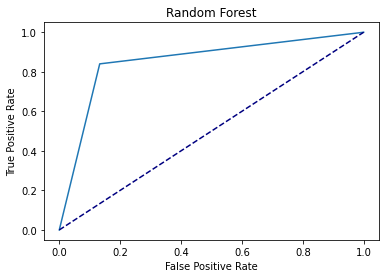

AUC: 0.8500818495874355


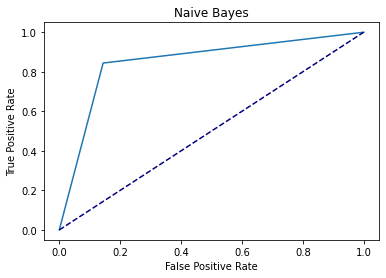

In [24]:
# Get predicitons
def get_preds(test_feat, train_feat, y_test, y_train, model, title='Random Forest'):
    y_train = np.asarray(y_train, dtype=np.float64)
    y_test = np.asarray(y_test, dtype=np.float64)
    model.fit(train_feat, y_train)
    preds = model.predict(test_feat)
    fpr, tpr, _ = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    print('AUC:', roc_auc)
    plt.plot(fpr, tpr)
    plt.title(title)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    return preds
preds_rf = get_preds(test_feat, train_feat, 
                  y_test, y_train, 
                  RandomForestClassifier(n_estimators = 100))

preds_nb = get_preds(test_feat, train_feat, 
                  y_test, y_train, 
                  MultinomialNB(), title='Naive Bayes')

# Tf-idf
AUC ~ 0.859

In [25]:
# TFIDF train set
tfidf_transformer = TfidfTransformer().fit(train_feat)
train_tfidf = tfidf_transformer.transform(train_feat)

# apply tfidf to test set
test_tfidf = tfidf_transformer.transform(test_feat)

AUC: 0.8508282717360693


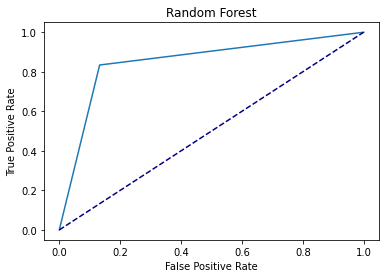

AUC: 0.8593538953558316


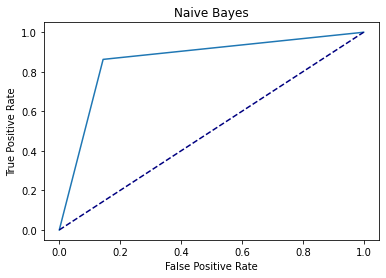

In [26]:
# Get Results
preds_rf2 = get_preds(test_tfidf, train_tfidf, 
                  y_test, y_train, 
                  RandomForestClassifier(n_estimators = 100))

preds_nb2 = get_preds(test_tfidf, train_tfidf, 
                  y_test, y_train, 
                  MultinomialNB(), title='Naive Bayes')

# Word2Vec
**AUC With randomn forest ~ 0.863 (highest) most accurate model**

In [29]:
 # Set parameters
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
num_features = 300                   
min_word_count = 40                         
num_workers = 4       
context = 10                                                                                      
downsampling = 1e-3   

# Initialize and train the model
model = Word2Vec(data['lemmatized'], workers=num_workers,
                 vector_size=num_features, min_count = min_word_count,
                 window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).


In [38]:
def makeFeatureVec(words, model, num_features):
    '''Average all of the word vectors in a paragraph'''
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0
    # ICreate a set of words on voc 
    index2word_set = set(model.wv.index_to_key)
    # Add feature vectors if they are inside model vocabulary
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1
            featureVec = np.add(featureVec,model.wv[word])
    # Get averages
    featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):
    '''
    Given a set of reviews (each one a list of words), calculate 
    the average feature vector for each one and return a 2D numpy array 
    '''
    # Initialize a counter
    counter = 0
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    # Loop through the reviews
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,
                                                   num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [39]:
# Calculate average feature vectors for training and testing sets,
clean_train_reviews = [review_to_words(review, string=False, remove_stopwords=True) for review in X_train.review]
trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)
clean_test_reviews = [review_to_words(review, string=False, remove_stopwords=True) for review in X_test.review]
testDataVecs = getAvgFeatureVecs(clean_test_reviews, model, num_features)

AUC: 0.863976115611457


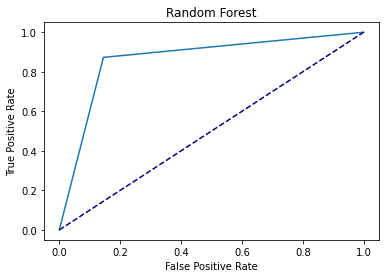

AUC: 0.7787407633909802


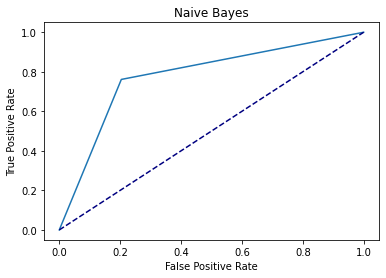

In [40]:
# Get Results
preds_rf1 = get_preds(testDataVecs, trainDataVecs, 
                      y_test, y_train, 
                      RandomForestClassifier(n_estimators = 100))

# Use Gaussian NB because Multinomial doesn't work with negative feature values
preds_nb1 = get_preds(testDataVecs, trainDataVecs, 
                      y_test, y_train, 
                      GaussianNB(), title='Naive Bayes')